パフォーマンスモニターをcsv形式に変換する。

relog localhost_000001.blg -o localhost_000001.csv -f CSV

完成したcsvファイルは、下記の作業を前以って実施することで加工しやすくする。
[\\]、[' ']をなくす。

In [57]:
import pandas as pd
perlogs = pd.read_csv("C:\TANIGUCHIJUN_20170217-000001\Performance_Counter.csv")

In [68]:
timestamps = []
jobs = []
#JOB起動時間
start_date_time = "2017-02-17 22:11:20.947"
#JOB終了時間
end_date_time   = "2017-02-17 22:14:00.949"

for timestamp in perlogs["(PDH-CSV4.0)("]:
    time = timestamp[-12:]
    date = timestamp[:10]
    timestamp = date + ' ' + time
    date_time = pd.to_datetime(timestamp)
    #実際に起動した時間のみ、JOB列にフラグ1を立てる
    if pd.to_datetime(start_date_time) < date_time and date_time < pd.to_datetime(end_date_time):
        job = 1
    else:
        job = 0
    timestamps.append(date_time) 
    jobs.append(job)
    i+=1
perlogs["TIMESTAMP"] = pd.Series(timestamps)
perlogs["JOB"] = pd.Series(jobs)
joblogs = perlogs[perlogs["JOB"] == 1]
joblogs

,(PDH-CSV4.0)(,TANIGUCHIJUNIPv6DatagramsReceivedDelivered/sec,TANIGUCHIJUNIPv6DatagramsReceivedUnknownProtocol,TANIGUCHIJUNIPv6FragmentedDatagrams/sec,TANIGUCHIJUNIPv6Datagrams/sec,TANIGUCHIJUNIPv6FragmentationFailures,TANIGUCHIJUNIPv6FragmentsRe-assembled/sec,TANIGUCHIJUNIPv6FragmentsReceived/sec,TANIGUCHIJUNIPv6DatagramsForwarded/sec,TANIGUCHIJUNIPv6DatagramsOutboundNoRoute,...,TANIGUCHIJUNProcess(igfxtray)HandleCount,TANIGUCHIJUNProcess(brs)HandleCount,TANIGUCHIJUNProcess(dwm)HandleCount,TANIGUCHIJUNProcess(lsm)HandleCount,TANIGUCHIJUNProcess(mmc)HandleCount,TANIGUCHIJUNProcess(UNS)HandleCount,TANIGUCHIJUNProcess(LMS)HandleCount,TANIGUCHIJUNProcess(CMA)HandleCount,TIMESTAMP,JOB
3,02/17/201722:11:21.949,0.000000,0,0.0,6.985967,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:24.939,1.0
4,02/17/201722:11:22.942,0.000000,0,0.0,0.000000,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:25.944,1.0
5,02/17/201722:11:23.935,2.013869,0,0.0,3.020804,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:26.944,1.0
6,02/17/201722:11:24.939,0.000000,0,0.0,6.970841,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:27.945,1.0
7,02/17/201722:11:25.944,0.000000,0,0.0,0.000000,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:28.946,1.0
8,02/17/201722:11:26.944,8.007975,0,0.0,18.017943,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:29.936,1.0
9,02/17/201722:11:27.945,0.998776,0,0.0,7.990212,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:30.945,1.0
10,02/17/201722:11:28.946,0.000000,0,0.0,2.997062,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:31.938,1.0
11,02/17/201722:11:29.936,1.010142,0,0.0,17.172414,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:32.946,1.0
12,02/17/201722:11:30.945,0.990967,0,0.0,1.981934,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:33.949,1.0


In [71]:
AvailableMBytes         = joblogs["TANIGUCHIJUNMemoryAvailableMBytes"]
DiskTime                = joblogs["TANIGUCHIJUNPhysicalDisk(0C:)%DiskTime"]
Pages_sec               = joblogs["TANIGUCHIJUNMemoryPages/sec"]
BytesTotal_sec          = joblogs["TANIGUCHIJUNNetworkInterface(TeredoTunnelingPseudo-Interface)BytesTotal/sec"]
Avg_DiskQueueLength     = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)Avg.DiskQueueLength"]
CurrentDiskQueueLength  = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)CurrentDiskQueueLength"]
DiskWrites_sec          = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)DiskWrites/sec"]
Processor_ProcessorTime = joblogs["TANIGUCHIJUNProcessor(_Total)%ProcessorTime"]
Process_ProcessorTime   = joblogs["TANIGUCHIJUNProcess(McTkSchedulerService)%ProcessorTime"]
UserTime                = joblogs["TANIGUCHIJUNProcessor(_Total)%UserTime"]
InterruptTime           = joblogs["TANIGUCHIJUNProcessor(_Total)%InterruptTime"]

In [70]:
import numpy as np
import matplotlib.pyplot as plt
#perlogs.interpolate()
#perlogs.dropna(subset=['TANIGUCHIJUNIPv6DatagramsReceivedDelivered/sec']).shape

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(11,figsize=(20,50))

ax1.plot(timestamps, AvailableMBytes, linewidth=2)
ax1.set_ylabel('AvailableMBytes')
ax1.grid(True)

ax2.plot(timestamps, DiskTime, linewidth=2)
ax2.set_ylabel('DiskTime')
ax2.grid(True)

ax3.plot(timestamps, Pages_sec, linewidth=2)
ax3.set_ylabel('Pages_sec')
ax3.grid(True)

ax4.plot(timestamps, BytesTotal_sec, linewidth=2)
ax4.set_ylabel('BytesTotal_sec')
ax4.grid(True)

ax5.plot(timestamps, Avg_DiskQueueLength, linewidth=2)
ax5.set_ylabel('Avg_DiskQueueLength')
ax5.grid(True)

ax6.plot(timestamps, CurrentDiskQueueLength, linewidth=2)
ax6.set_ylabel('CurrentDiskQueueLength')
ax6.grid(True)

ax7.plot(timestamps, DiskWrites_sec, linewidth=2)
ax7.set_ylabel('DiskWrites_sec')
ax7.grid(True)

ax8.plot(timestamps, Processor_ProcessorTime, linewidth=2)
ax8.set_ylabel('Processor_ProcessorTime')
ax8.grid(True)

ax9.plot(timestamps, Process_ProcessorTime, linewidth=2)
ax9.set_ylabel('Process_ProcessorTime')
ax9.grid(True)

ax10.plot(timestamps, UserTime, linewidth=2)
ax10.set_ylabel('UserTime')
ax10.grid(True)

ax11.plot(timestamps, InterruptTime, linewidth=2)
ax11.set_ylabel('InterruptTime')
ax11.grid(True)

filename = "C:\TANIGUCHIJUN_20170217-000001\output.png"
plt.savefig(filename)

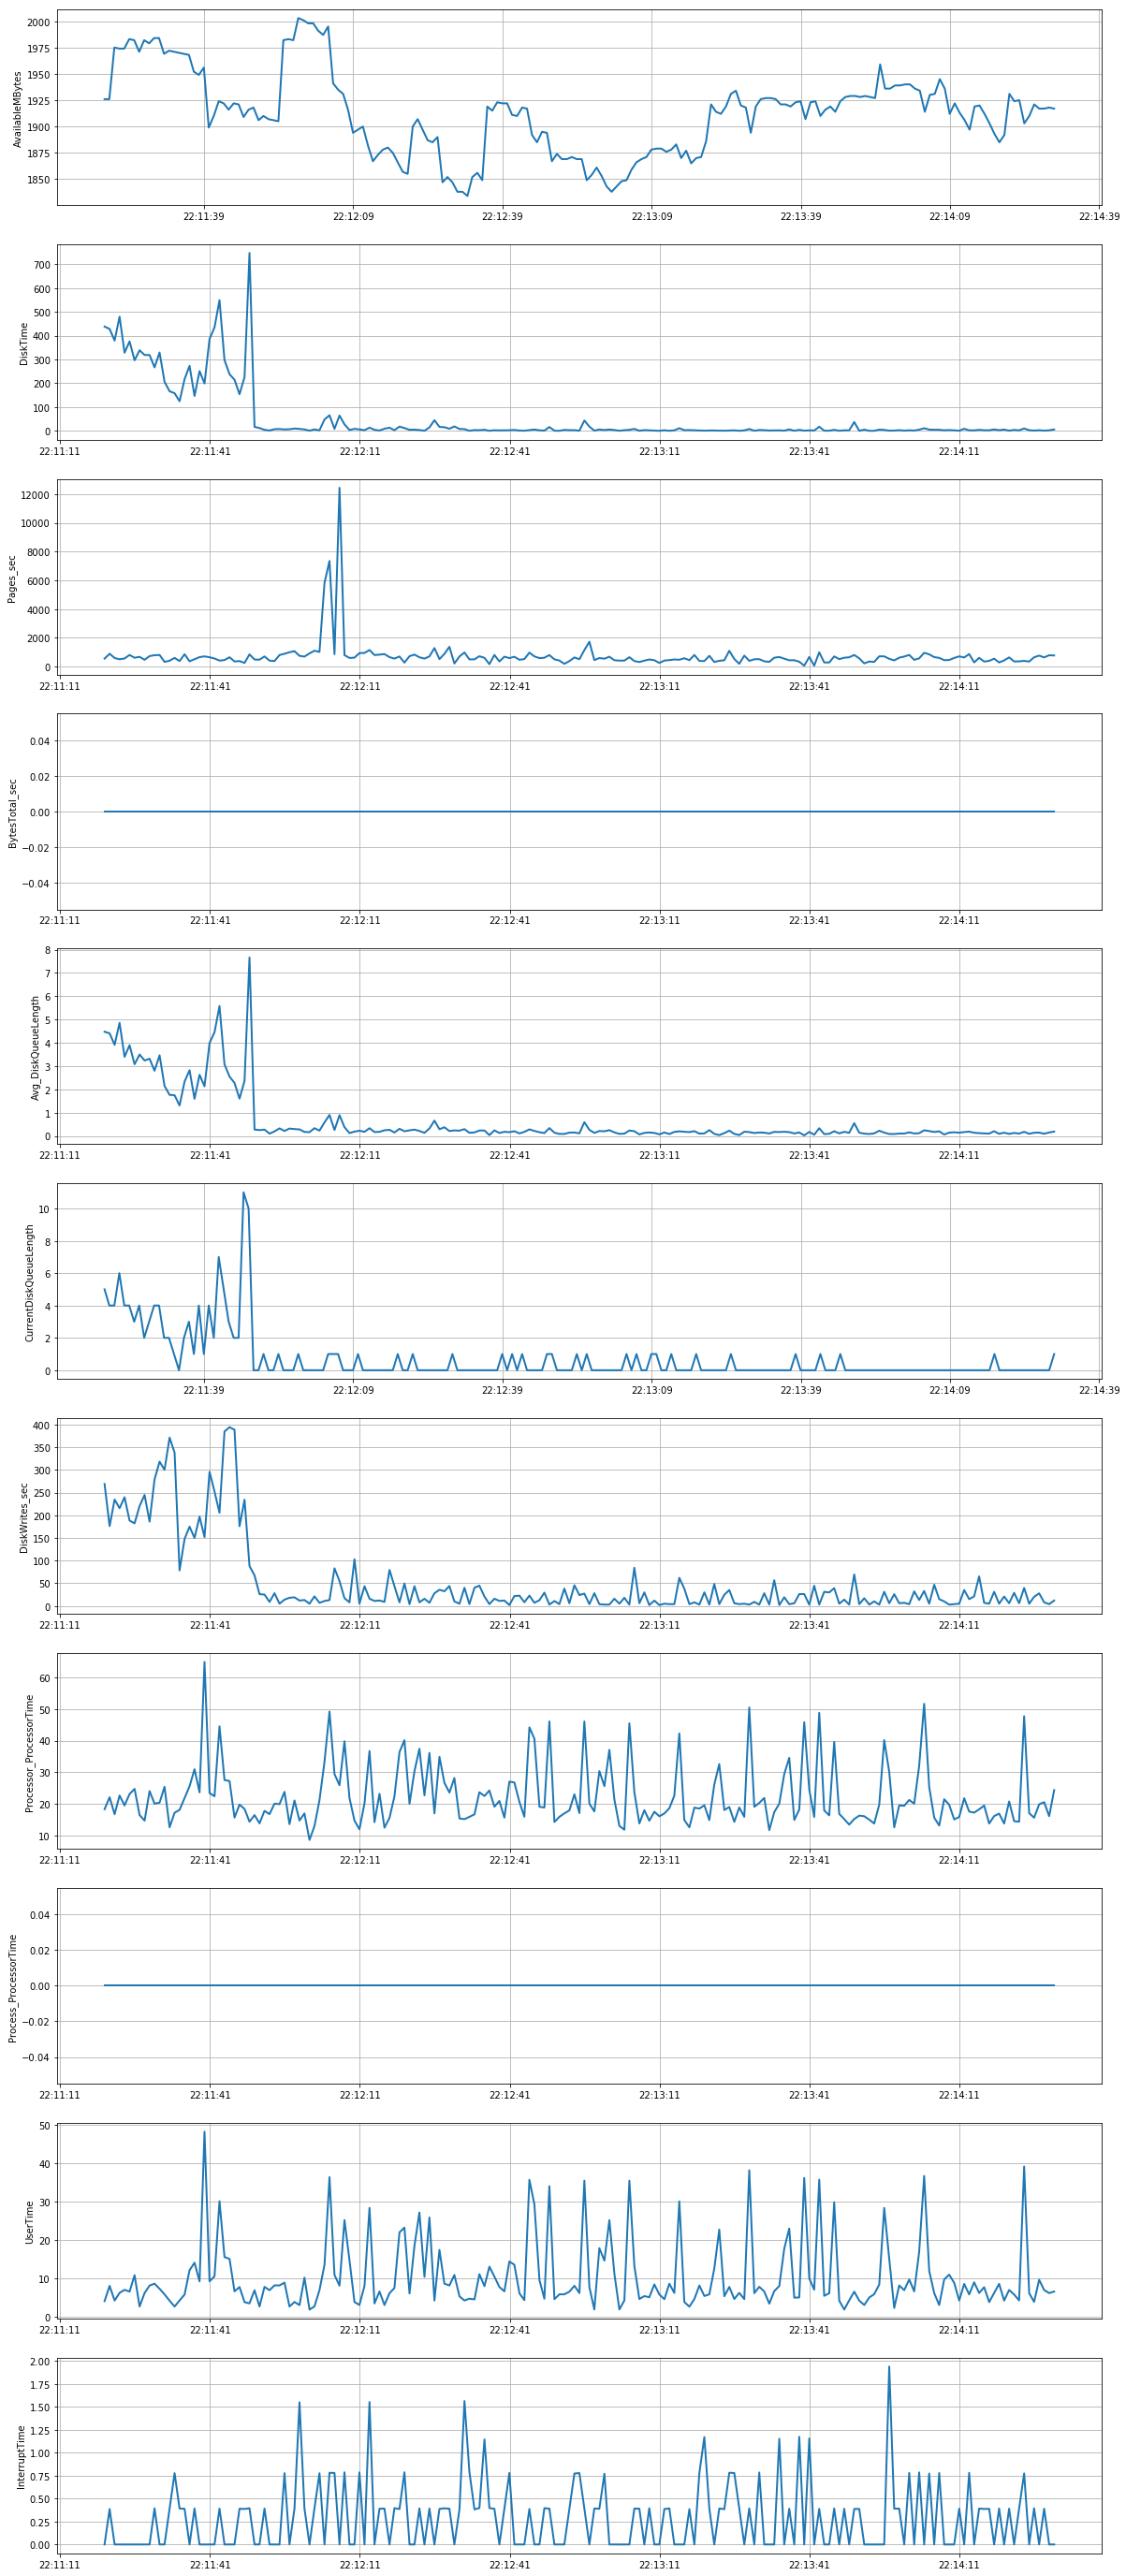

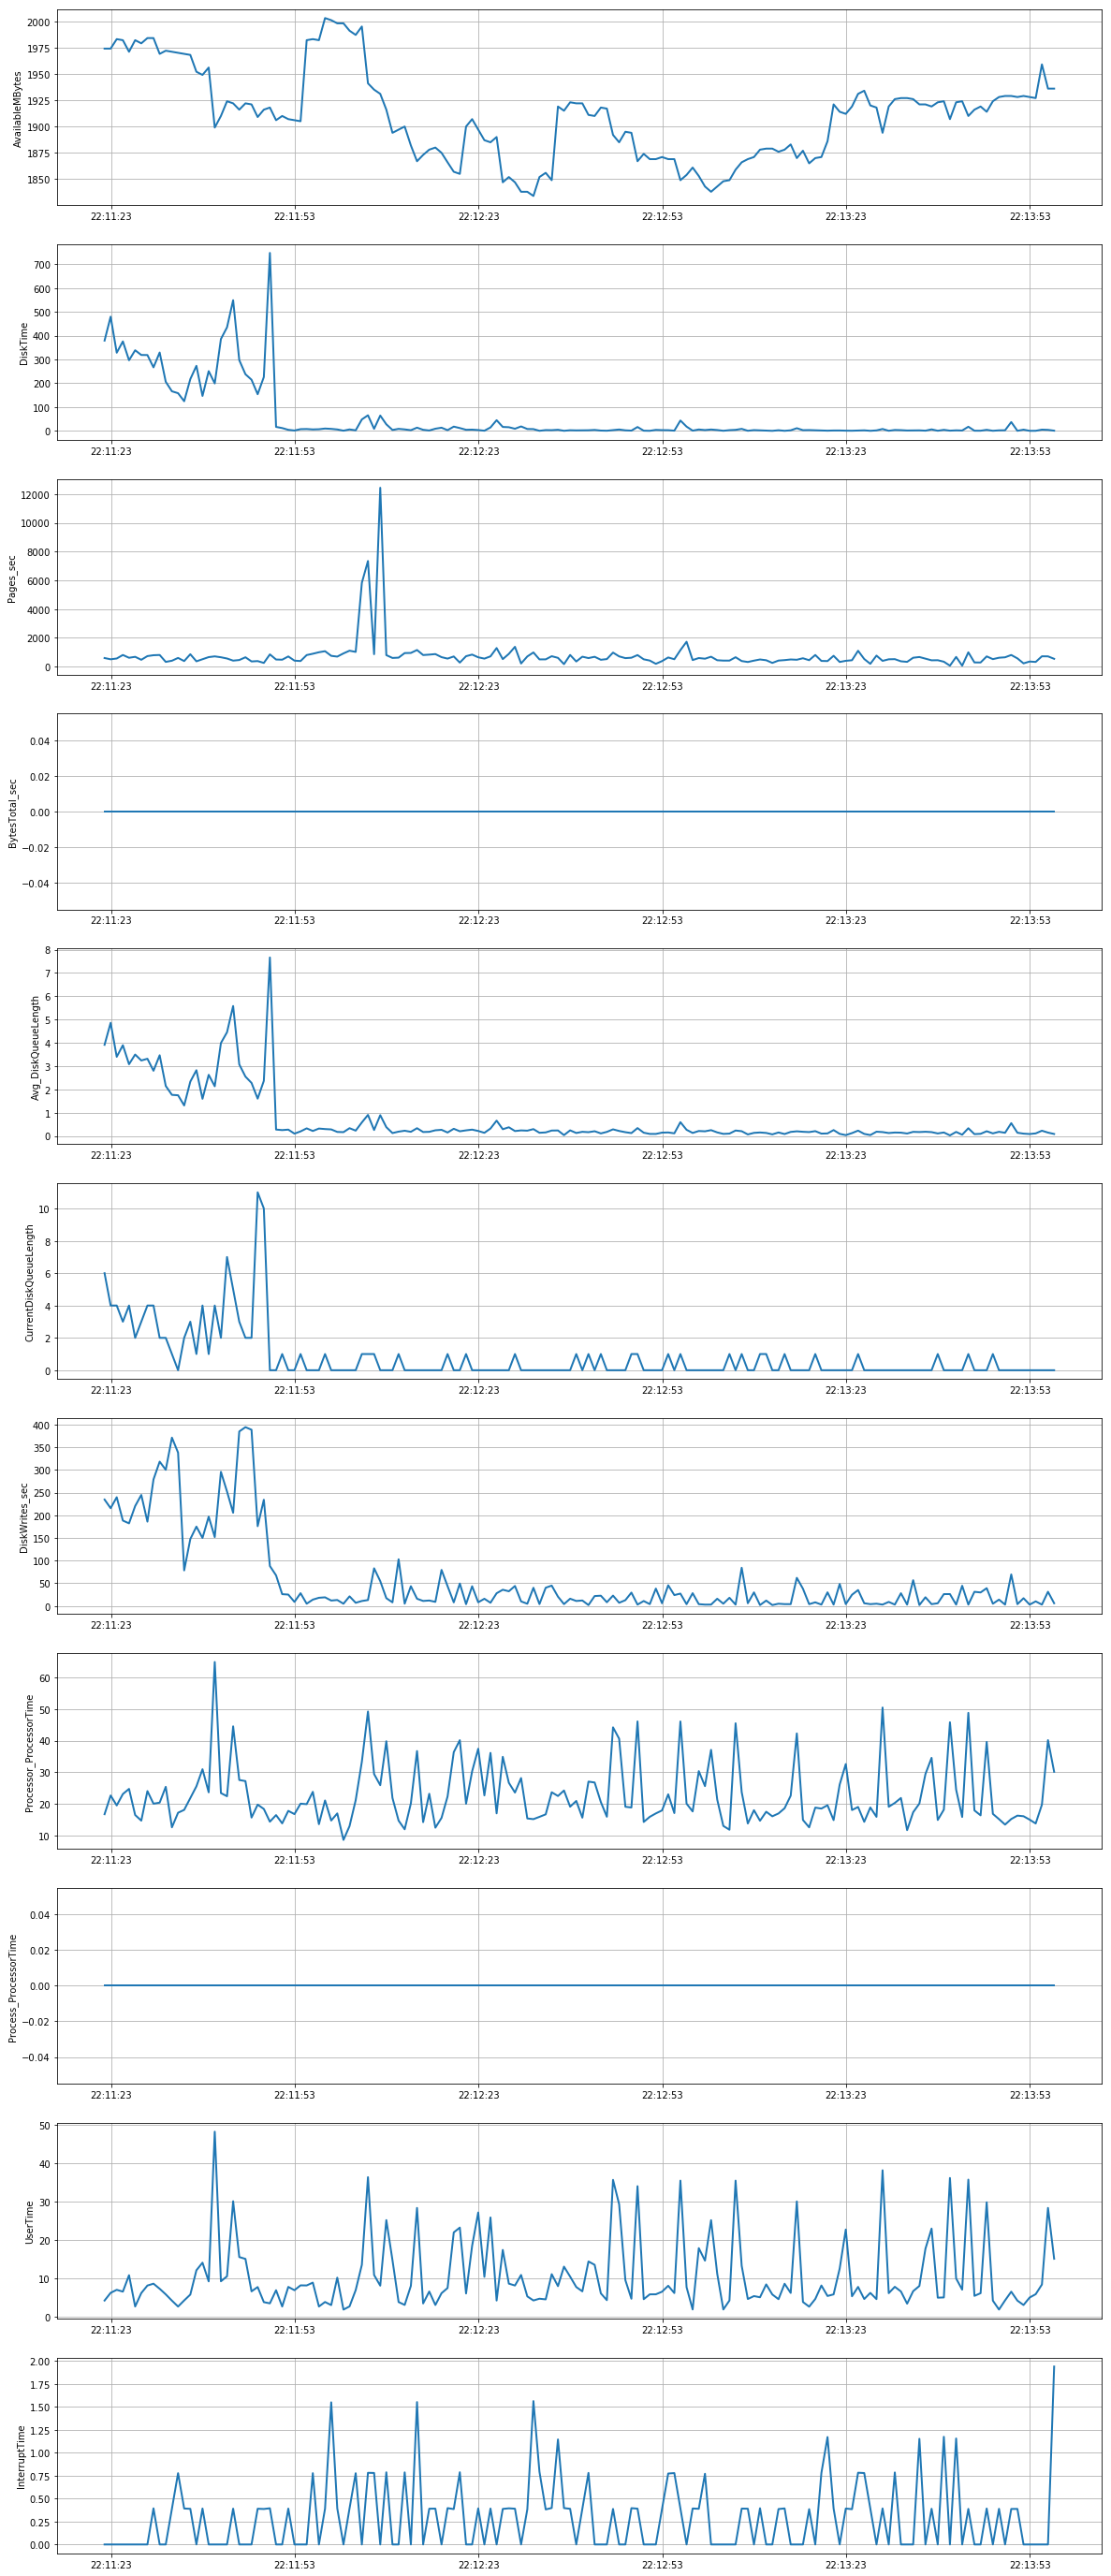

In [73]:
plt.show()